# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time
# import early stopping
from tensorflow.keras.callbacks import EarlyStopping
# import batch normalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.losses import CategoricalCrossentropy


from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

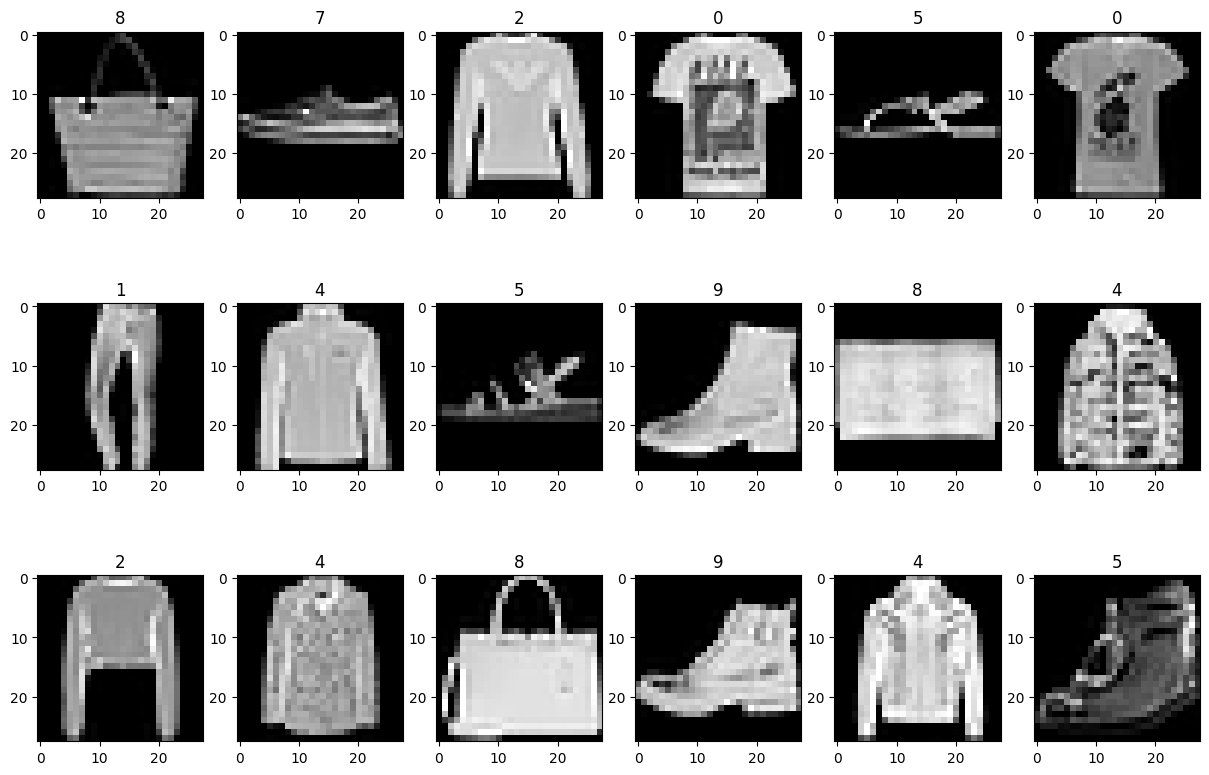

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [4]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [11]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 88ms/step - accuracy: 0.8178 - loss: 0.5489 - val_accuracy: 0.8850 - val_loss: 0.3221
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.9034 - loss: 0.2740 - val_accuracy: 0.8895 - val_loss: 0.3045
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.9172 - loss: 0.2283 - val_accuracy: 0.8929 - val_loss: 0.3028
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.9296 - loss: 0.1960 - val_accuracy: 0.8947 - val_loss: 0.3159
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.9403 - loss: 0.1690 - val_accuracy: 0.8956 - val_loss: 0.3286
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 90s 95ms/step - accuracy: 0.9472 - loss: 0.1479 - val_accuracy: 0.8927 - val_loss: 0.3583
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.9533 - loss: 0.1304 - val_accuracy: 0.8916 - val_loss: 0.3929
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9590 - loss: 0.1150 - 

In [5]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

Train Acc      0.9940166473388672
Validation Acc 0.8787999749183655


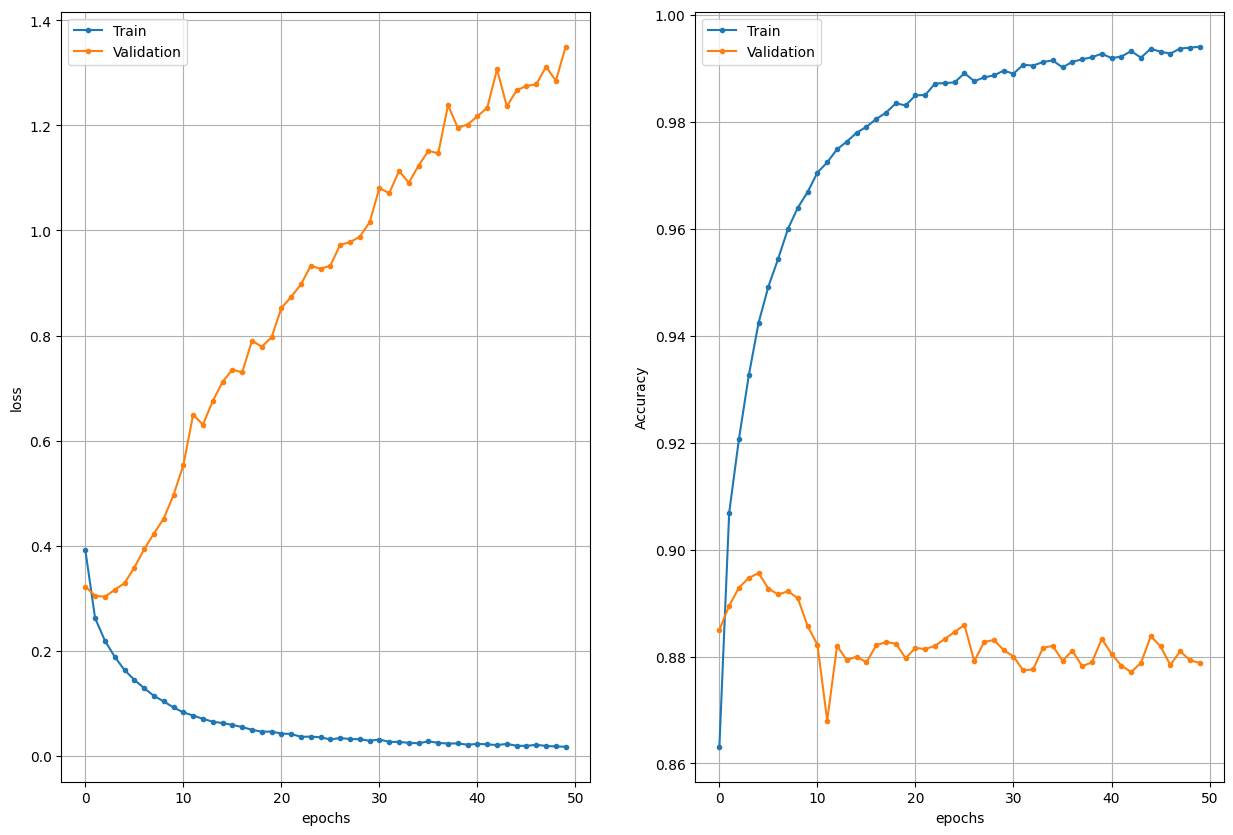

In [ ]:
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.7899 - loss: 1.3198 - val_accuracy: 0.8856 - val_loss: 1.1280
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8897 - loss: 1.1493 - val_accuracy: 0.8948 - val_loss: 1.1110
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8978 - loss: 1.1349 - val_accuracy: 0.8973 - val_loss: 1.1046
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.9045 - loss: 1.1247 - val_accuracy: 0.9027 - val_loss: 1.0997
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9068 - loss: 1.1190 - val_accuracy: 0.9051 - val_loss: 1.0954
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9084 - loss: 1.1153 - val_accuracy: 0.9066 - val_loss: 1.0940
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9127 - loss: 1.1101 - val_accuracy: 0.9105 - val_loss: 1.0909
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9145 - loss: 1.1092 - 

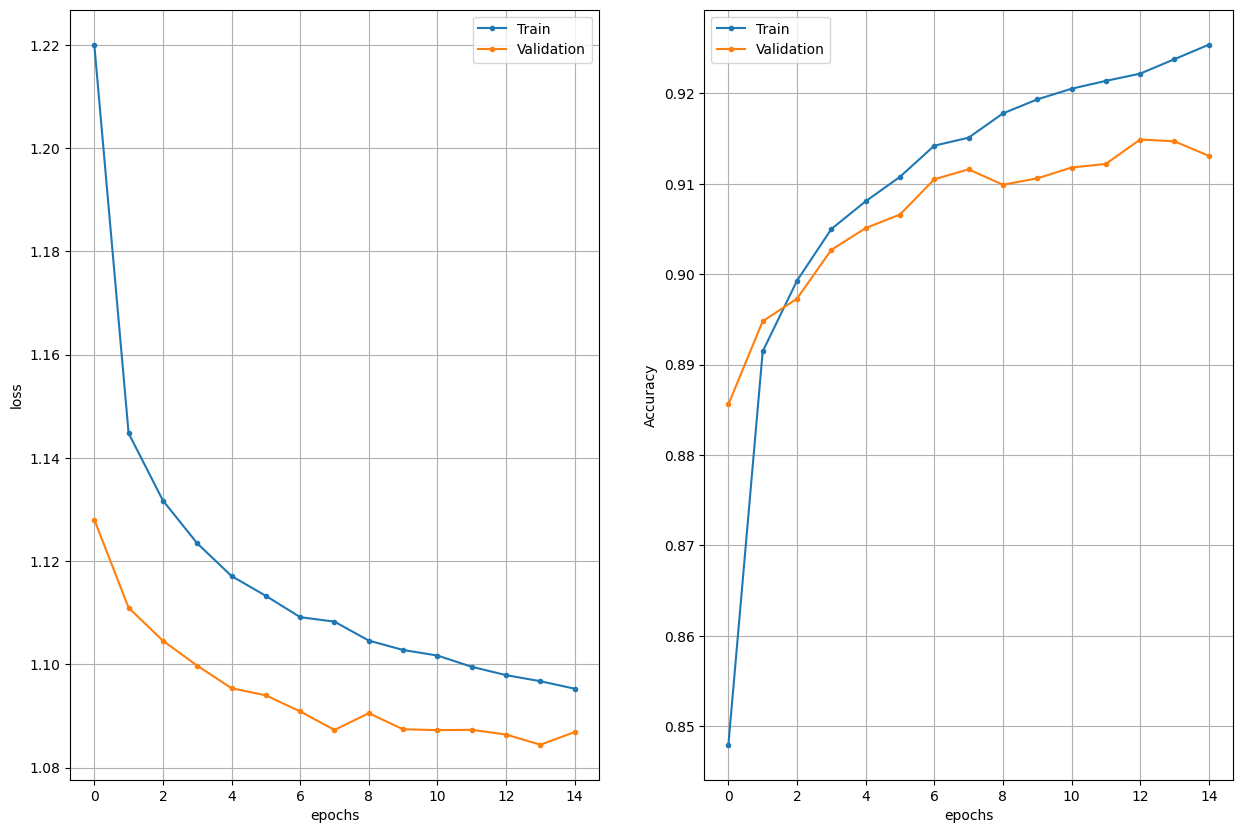

In [11]:
# smoothing + dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import regularizers


loss_fn = CategoricalCrossentropy(label_smoothing=0.2)

weight_decay = 1e-4
# dropout = 0.3
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust
inputs = Input(shape=(28, 28, 1))
net = Conv2D( 32, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay), activation='relu')(inputs)

net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
net = Dense(128,kernel_regularizer=regularizers.l2(weight_decay), activation='relu')(net)

net = Dropout(0.3)(net) 
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)

epochs = 15
batch_size = 64

model.compile(loss=loss_fn, optimizer="adam", metrics=["accuracy"])

y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_hot = tf.keras.utils.to_categorical(y_test, num_classes)

history = model.fit(
    x_train, y_train_hot,
    validation_data=(x_test, y_test_hot),
    epochs=epochs,
    batch_size=batch_size
)

plot_history(history)

### Questions

* What have you done in order to improve the performance?
- label smoothing 0.2
- max pooling
- l2 regularizer (weight decay)
- earlier stopping (15 epoch)
* Have you tried configurations that did not work out?
> early stopping: 0.8947

> early stopping + dropout(0.5): 0.8937

> early stopping + dropout(0.3): 0.8966

> early stopping + dropout(0.5) + batch norm: 0.8676

> early stopping + dropout(0.3) + batch norm: 0.8537

> early stopping + dropout(0.3) + weight decay: ~0.88

> early stopping + dropout(0.3) + label smoothing + maxpool: 0.9082

> early stopping + augmentation (horizontal flip) + maxpool: 0.8946

> early stopping + augmentation (horizontal flip, rotation 15degrees) + maxpool: 0.8691